In [6]:
import os
import sys
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm import tqdm

print("Importing your from-scratch regressor classes...")
try:

    from RandomForest import RandomForestRegressor
    
    
except ImportError as e:
    print(f"\n--- 🛑 IMPORT ERROR ---")
    print(f"Error importing a class: {e}")
    print("Please make sure your .py files are in the same directory and")

except Exception as e:
    print(f"An unexpected error occurred: {e}")


# --- Suppress Warnings ---
warnings.filterwarnings('ignore', category=UserWarning)

# --- Matplotlib Setup ---
%matplotlib inline
sns.set(style="whitegrid", palette="muted")

print("All libraries imported successfully.")

Importing your from-scratch regressor classes...
All libraries imported successfully.


In [7]:
# ❗ **ACTION REQUIRED**: Update this path to your BodyFat CSV file.
DATA_PATH = r'C:\Users\jaink\OneDrive\Desktop\MLProject\BodyFat\bodyfat.csv'

if not os.path.exists(DATA_PATH):
    print(f"Error: Data file not found at {DATA_PATH}")
    print("Please update the 'DATA_PATH' variable in this cell.")
else:
    df = pd.read_csv(DATA_PATH)
    print(f"Dataset loaded successfully. Shape: {df.shape}")

Dataset loaded successfully. Shape: (252, 15)


In [8]:
print("--- Data Info ---")
df.info()
print("\n--- Missing Values ---")
print(df.isnull().sum())

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB

--- Missing Values ---
Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0

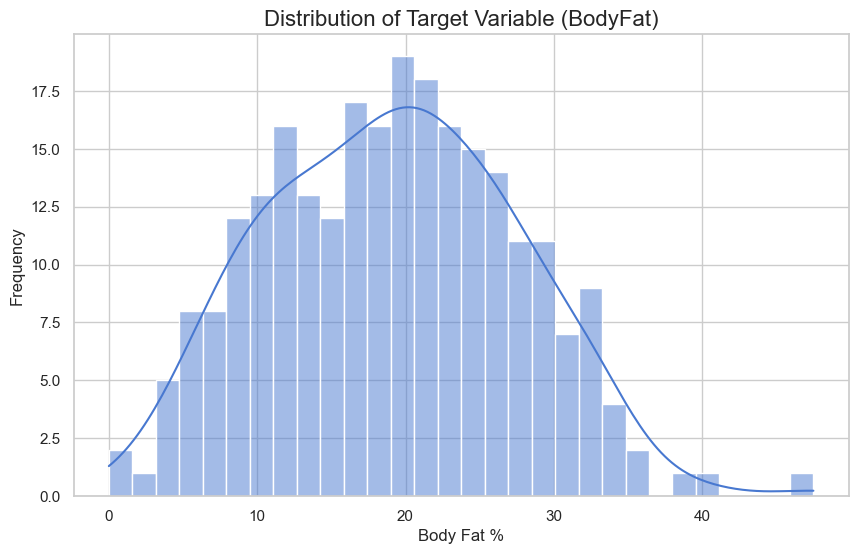

In [9]:
# --- Target Variable: BodyFat ---
plt.figure(figsize=(10, 6))
sns.histplot(df['BodyFat'], kde=True, bins=30)
plt.title('Distribution of Target Variable (BodyFat)', fontsize=16)
plt.xlabel('Body Fat %')
plt.ylabel('Frequency')
plt.show()

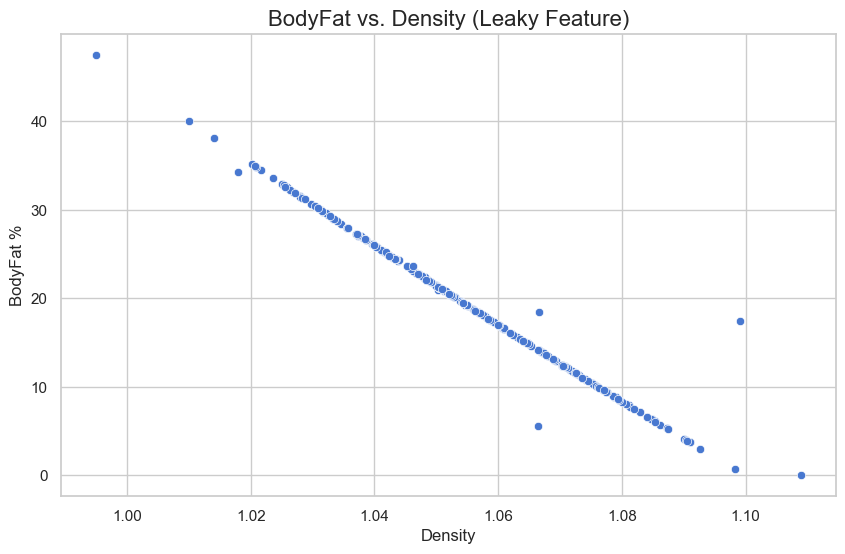

In [10]:
# --- Leaky Feature: BodyFat vs. Density ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Density', y='BodyFat')
plt.title('BodyFat vs. Density (Leaky Feature)', fontsize=16)
plt.xlabel('Density')
plt.ylabel('BodyFat %')
plt.show()

Original row count: 252
Cleaned row count: 248
Removed 4 outlier rows.


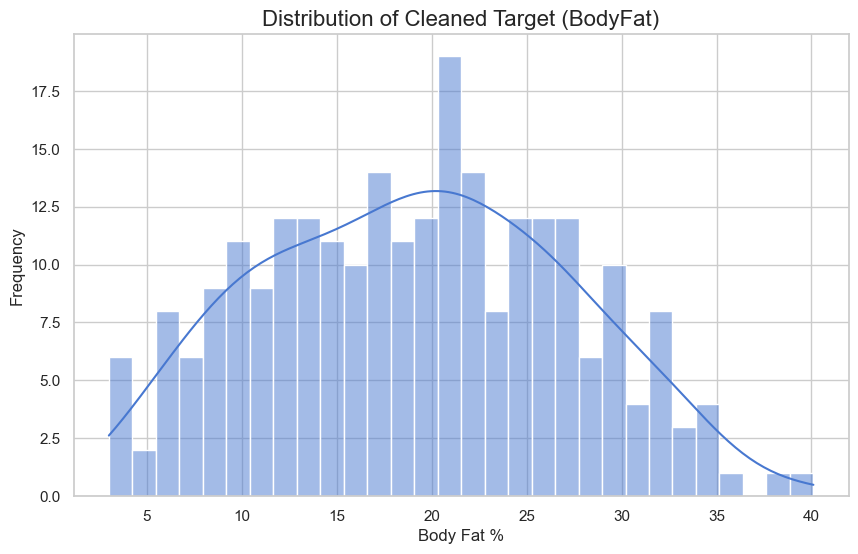

In [11]:
# --- Handling Outliers from EDA 3 ---
# We'll remove the physically impossible 0% BodyFat rows
# and also any extreme outliers.
original_count = len(df)
df_cleaned = df[(df['BodyFat'] > 1) & (df['BodyFat'] < 45)].copy()
df_cleaned = df_cleaned[df_cleaned['Height'] > 40] # Remove potential outliers

print(f"Original row count: {original_count}")
print(f"Cleaned row count: {len(df_cleaned)}")
print(f"Removed {original_count - len(df_cleaned)} outlier rows.")

# Re-plot BodyFat distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['BodyFat'], kde=True, bins=30)
plt.title('Distribution of Cleaned Target (BodyFat)', fontsize=16)
plt.xlabel('Body Fat %')
plt.ylabel('Frequency')
plt.show()

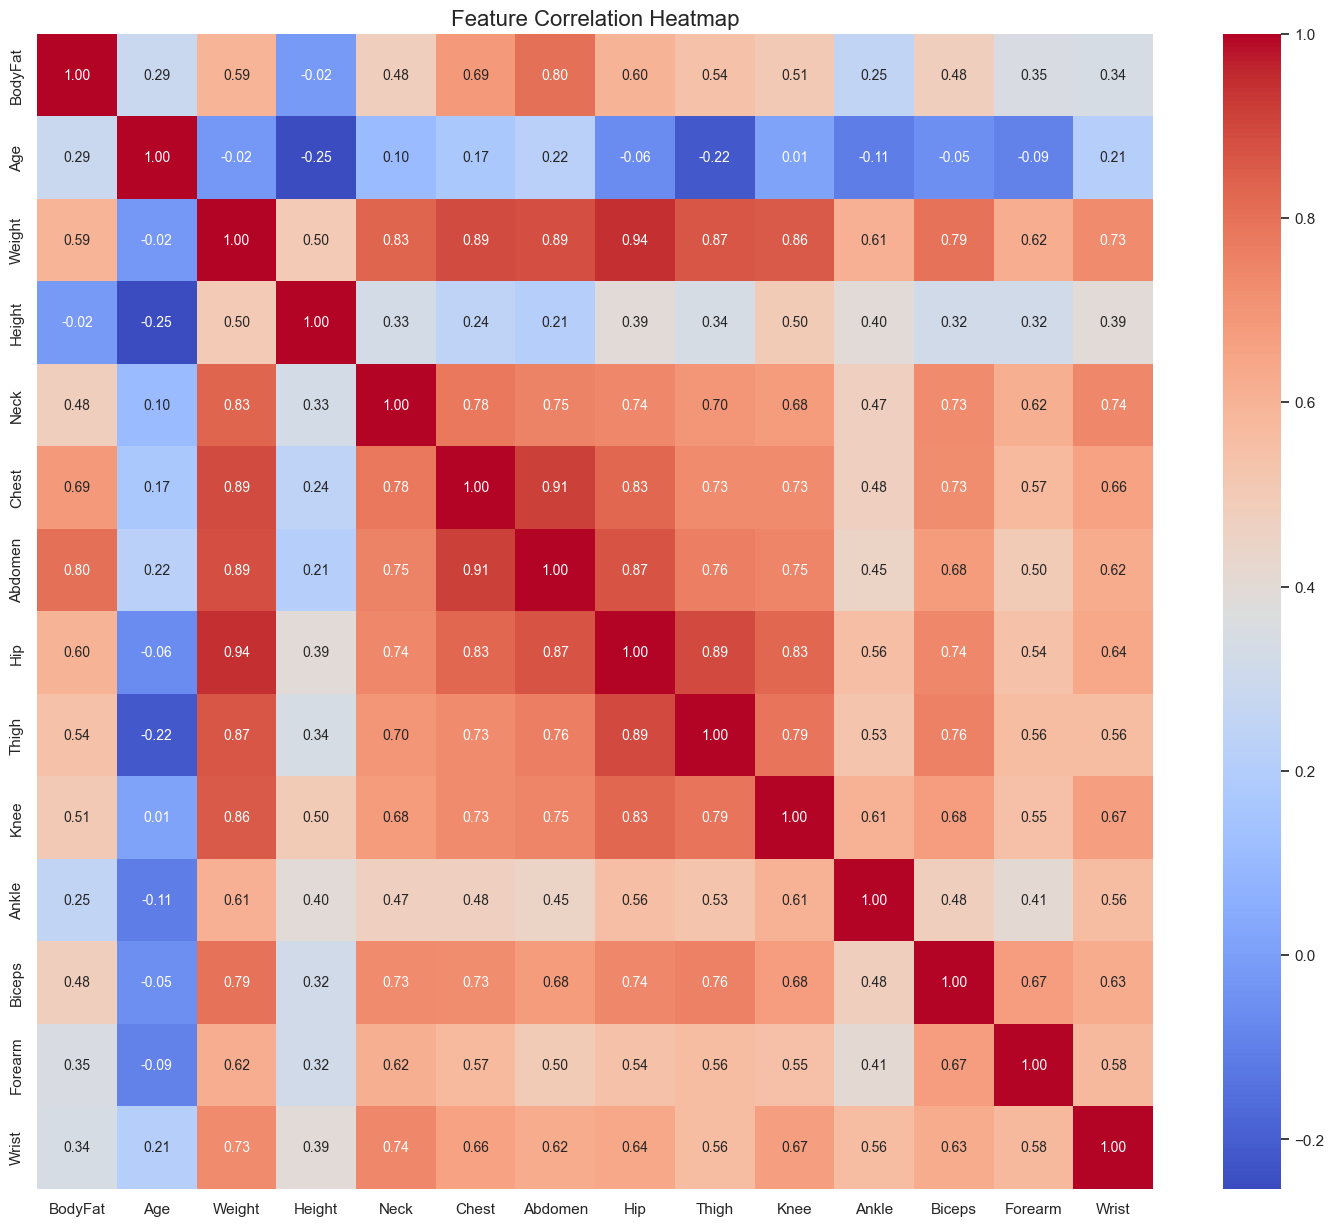

In [12]:
# --- Correlation Heatmap (on cleaned data) ---
plt.figure(figsize=(18, 15))
# We drop Density, as it's the leaky feature
correlation_matrix = df_cleaned.drop('Density', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 10})
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.show()

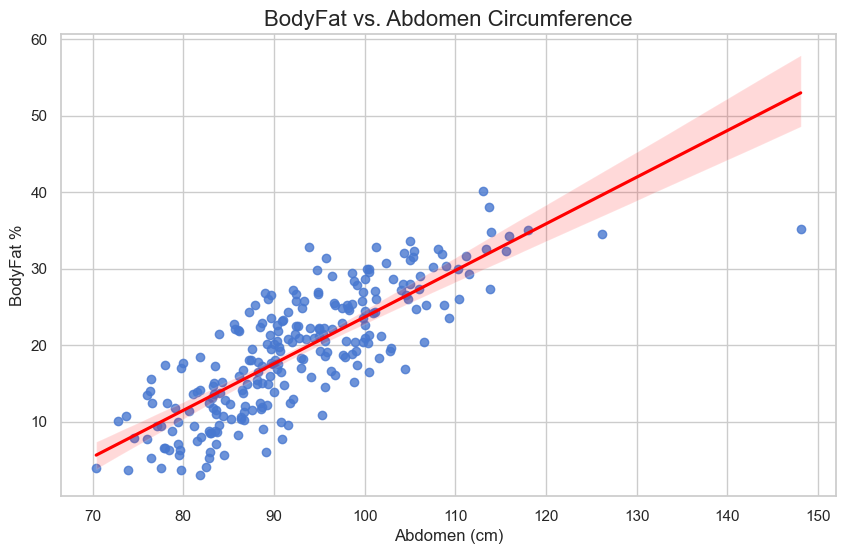

In [13]:
# --- Scatter Plot: Abdomen vs. BodyFat (Best Predictor) ---
plt.figure(figsize=(10, 6))
sns.regplot(data=df_cleaned, x='Abdomen', y='BodyFat', line_kws={"color": "red"})
plt.title('BodyFat vs. Abdomen Circumference', fontsize=16)
plt.xlabel('Abdomen (cm)')
plt.ylabel('BodyFat %')
plt.show()

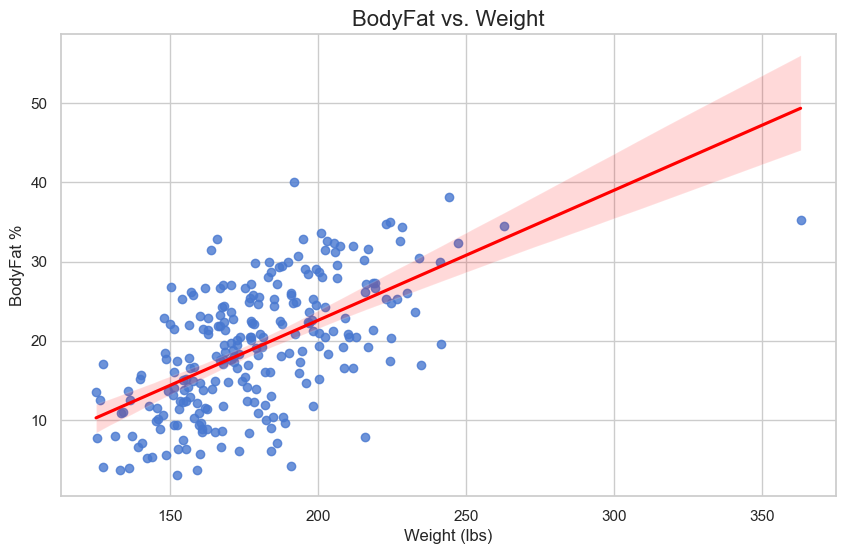

In [14]:
# --- Scatter Plot: Weight vs. BodyFat ---
plt.figure(figsize=(10, 6))
sns.regplot(data=df_cleaned, x='Weight', y='BodyFat', line_kws={"color": "red"})
plt.title('BodyFat vs. Weight', fontsize=16)
plt.xlabel('Weight (lbs)')
plt.ylabel('BodyFat %')
plt.show()

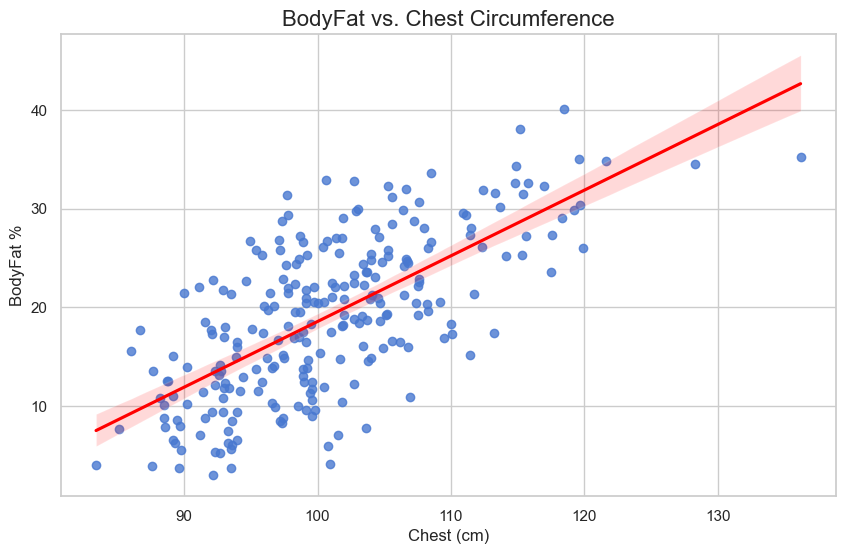

In [15]:
# --- Scatter Plot: Chest vs. BodyFat ---
plt.figure(figsize=(10, 6))
sns.regplot(data=df_cleaned, x='Chest', y='BodyFat', line_kws={"color": "red"})
plt.title('BodyFat vs. Chest Circumference', fontsize=16)
plt.xlabel('Chest (cm)')
plt.ylabel('BodyFat %')
plt.show()

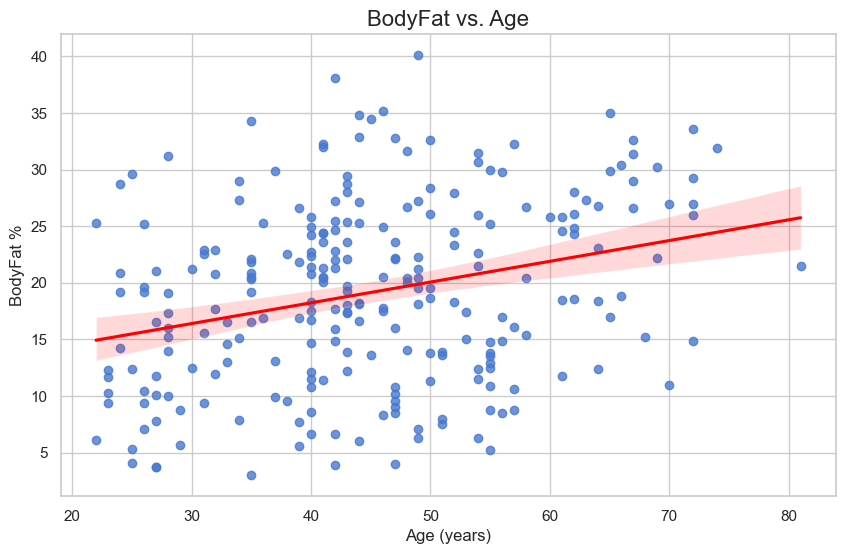

In [16]:
# --- Scatter Plot: Age vs. BodyFat ---
plt.figure(figsize=(10, 6))
sns.regplot(data=df_cleaned, x='Age', y='BodyFat', line_kws={"color": "red"})
plt.title('BodyFat vs. Age', fontsize=16)
plt.xlabel('Age (years)')
plt.ylabel('BodyFat %')
plt.show()

Generating Pair Plot... (This may take a moment)


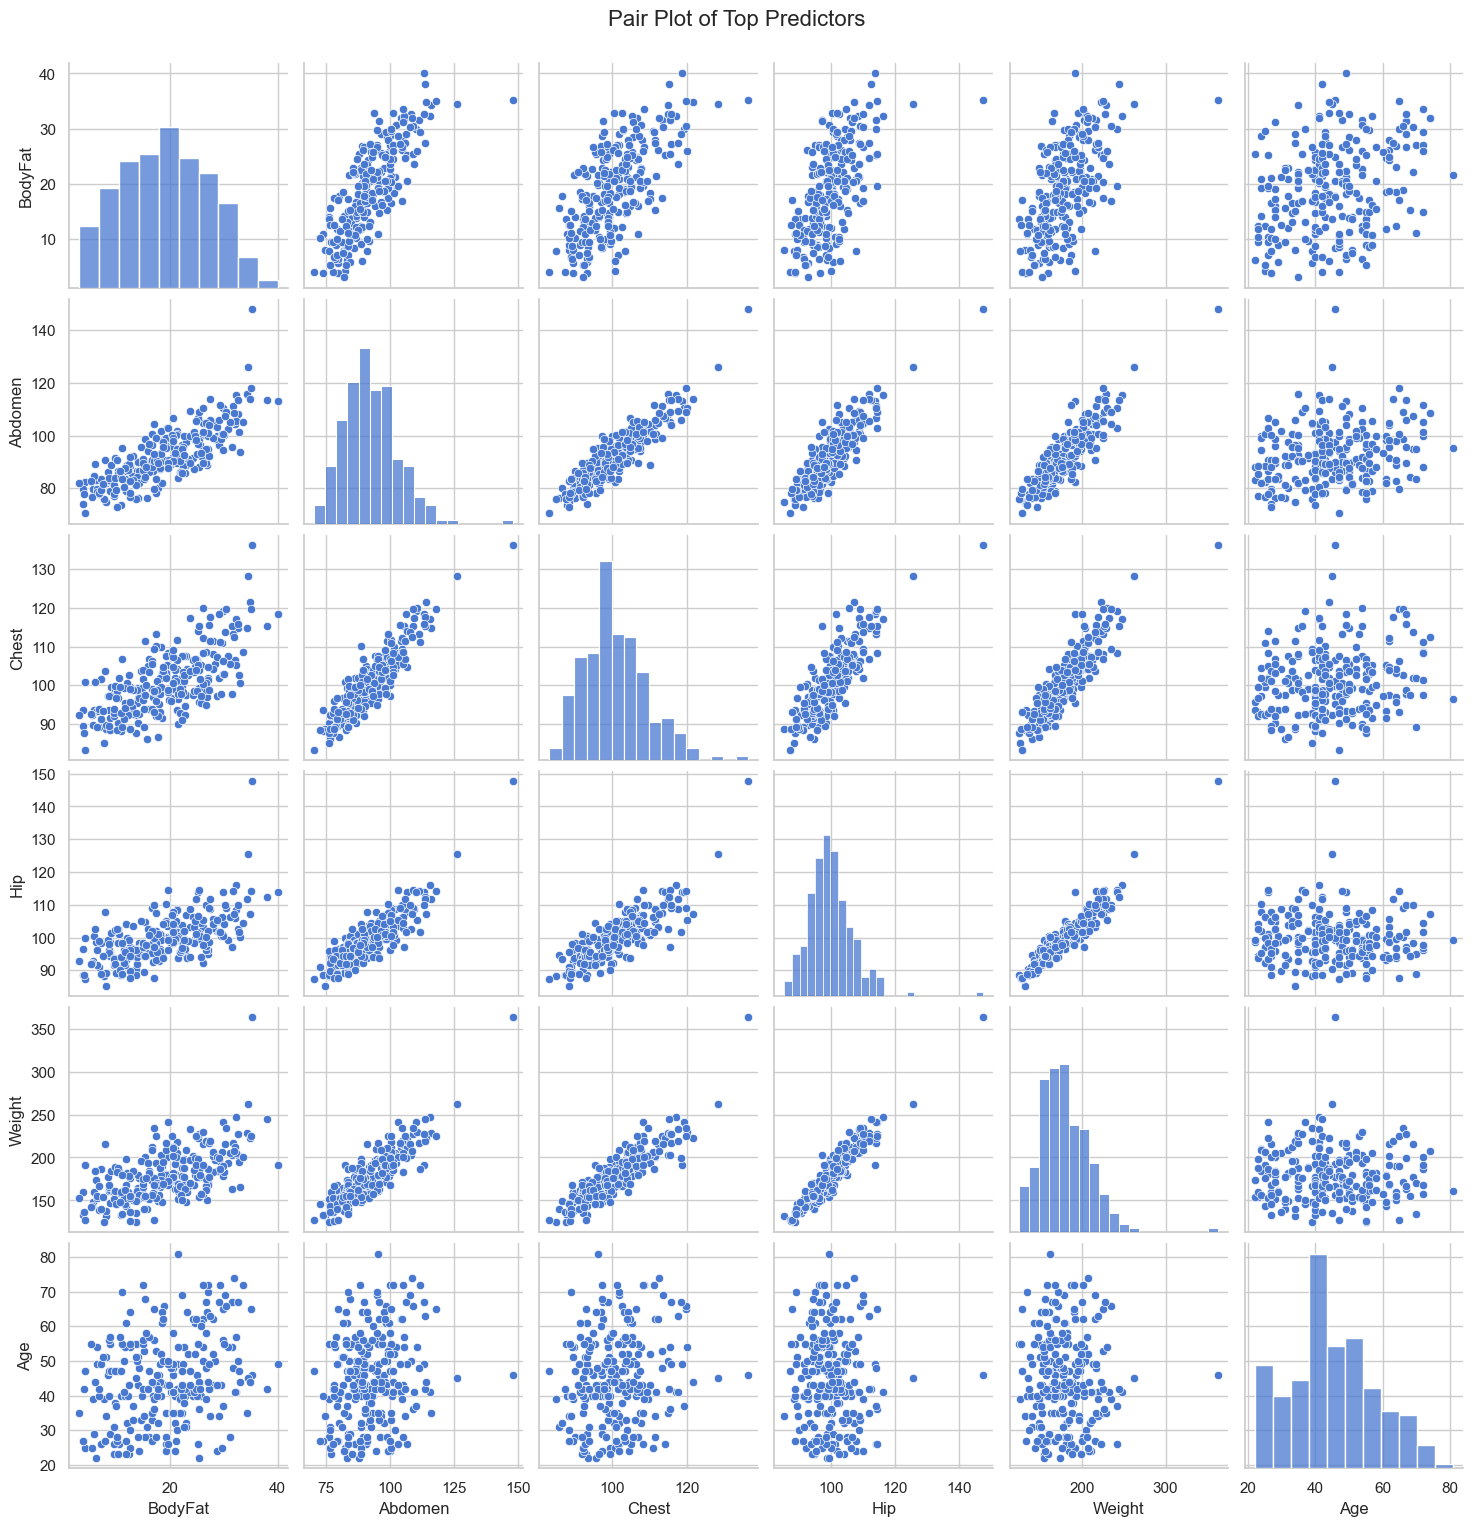

In [17]:
# --- Pair Plot of Top 5 Predictors vs. BodyFat ---
print("Generating Pair Plot... (This may take a moment)")
top_5_cols = ['BodyFat', 'Abdomen', 'Chest', 'Hip', 'Weight', 'Age']
sns.pairplot(df_cleaned[top_5_cols])
plt.suptitle('Pair Plot of Top Predictors', y=1.02, fontsize=16)
plt.show()

Generating 3D Scatter Plot...


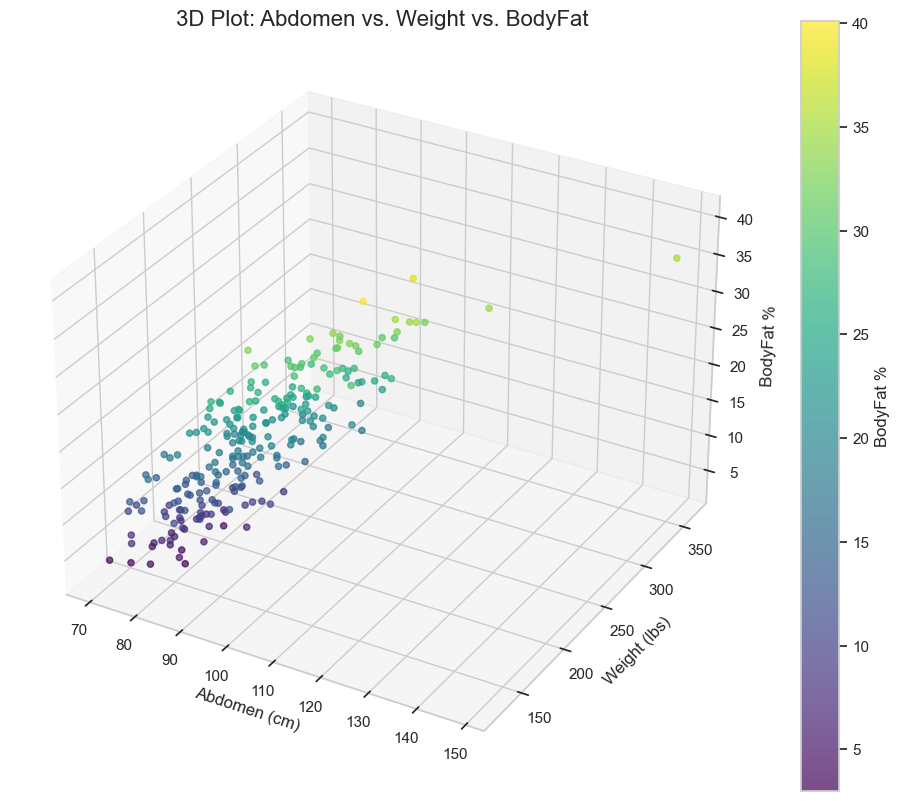

In [18]:
# --- 3D Scatter Plot: Abdomen vs. Weight vs. BodyFat ---
print("Generating 3D Scatter Plot...")

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plotting
scatter = ax.scatter(
    df_cleaned['Abdomen'], 
    df_cleaned['Weight'], 
    df_cleaned['BodyFat'], 
    c=df_cleaned['BodyFat'], # Color by the target value
    cmap='viridis', 
    s=20,
    alpha=0.7
)

ax.set_title('3D Plot: Abdomen vs. Weight vs. BodyFat', fontsize=16)
ax.set_xlabel('Abdomen (cm)')
ax.set_ylabel('Weight (lbs)')
ax.set_zlabel('BodyFat %')
fig.colorbar(scatter, ax=ax, label='BodyFat %')
plt.show()

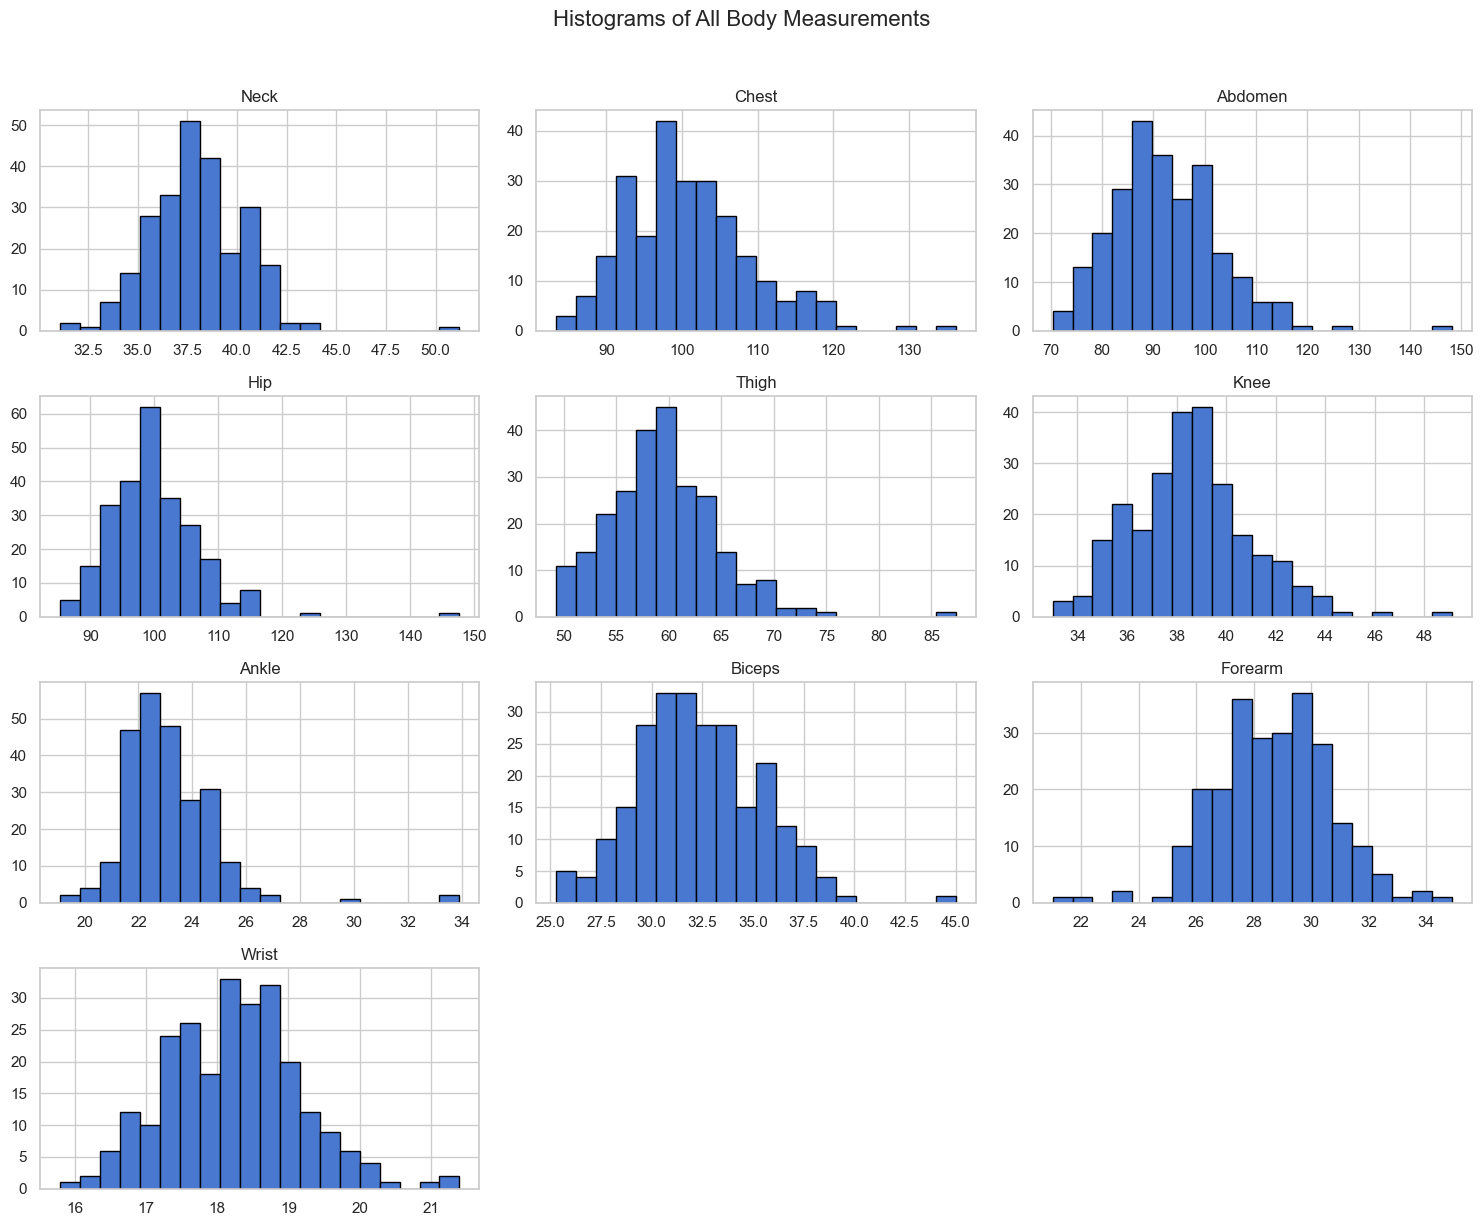

In [19]:
# --- Histograms of All Body Measurements ---
measure_cols = ['Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']
df_cleaned[measure_cols].hist(figsize=(15, 12), bins=20, edgecolor='black')
plt.suptitle('Histograms of All Body Measurements', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# --- Train-Test Split ---
# Use the df_cleaned DataFrame
# 1. Drop the leaky 'Density' feature
# 2. Define X (features) and y (target)
X = df_cleaned.drop(['BodyFat', 'Density'], axis=1)
y = df_cleaned['BodyFat']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (198, 13)
X_test shape: (50, 13)
y_train shape: (198,)
y_test shape: (50,)


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.exceptions import ConvergenceWarning

In [23]:
# --- Define Preprocessing Pipeline ---
# All features are numeric.
ALL_FEATURES = list(X.columns)
print(f"All {len(ALL_FEATURES)} features will be scaled.")

# Pipeline: 1. Impute (just in case), 2. Scale
preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

print("Preprocessing pipeline (Imputer + StandardScaler) defined.")

# --- Apply the Pipeline ---
print("Fitting and transforming X_train...")
X_train_processed = preprocessor.fit_transform(X_train)
print("Transforming X_test...")
X_test_processed = preprocessor.transform(X_test)

# --- Convert y to numpy arrays ---
y_train_np = y_train.values
y_test_np = y_test.values

print(f"\nPreprocessing complete.")

All 13 features will be scaled.
Preprocessing pipeline (Imputer + StandardScaler) defined.
Fitting and transforming X_train...
Transforming X_test...

Preprocessing complete.


In [24]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from itertools import product

# --- Hyperparameter Tuning & Cross-Validation Setup ---
print("Starting Hyperparameter Tuning with Cross-Validation...")

# 1. Define the parameter grid for the models you want to tune
param_grid = {
    "RandomForestRegressor": {
        "n_trees": [50, 100],
        "max_depth": [5, 10],
        "min_samples_split": [2, 5] # Assuming your class supports this
    }
    # You can add other from-scratch models here
}

# 2. Define Cross-Validation strategy
N_SPLITS = 5
kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=42)

# 3. Dictionaries to store results
best_params = {}
best_scores = {}

# Convert to NumPy arrays for efficiency (if they aren't already)
if hasattr(y_train, 'values'):
    y_train_np = y_train.values.ravel()
else:
    y_train_np = np.asarray(y_train).ravel()

if hasattr(X_train_processed, 'values'):
     X_train_np = X_train_processed.values
else:
     X_train_np = np.asarray(X_train_processed)


# --- Run Grid Search CV ---

# Iterate over each model defined in the parameter grid
for model_name in param_grid:
    print(f"\n--- Tuning {model_name} ---")
    
    grid = param_grid[model_name]
    keys = grid.keys()
    
    # Initialize trackers for this model
    model_best_score = float('inf') # Using RMSE, so lower is better
    model_best_params = {}

    # Create all combinations of parameters
    param_combinations = [dict(zip(keys, v)) for v in product(*grid.values())]

    for params in param_combinations:
        print(f"  Testing params: {params}")
        fold_scores = []
        
        # Perform K-Fold Cross-Validation
        for fold, (train_index, val_index) in enumerate(kf.split(X_train_np)):
            X_train_fold, X_val_fold = X_train_np[train_index], X_train_np[val_index]
            y_train_fold, y_val_fold = y_train_np[train_index], y_train_np[val_index]

            # Instantiate the model with current parameters
            try:
                if model_name == "RandomForestRegressor":
                    model = RandomForestRegressor(
                        **params, # Unpack all parameters from the grid
                        random_state=42
                    )
            
                
                else:
                    print(f"Warning: Model '{model_name}' not recognized. Skipping.")
                    continue

                # Fit the model
                model.fit(X_train_fold, y_train_fold)
                
                # Predict and evaluate
                y_pred = model.predict(X_val_fold)
                score = np.sqrt(mean_squared_error(y_val_fold, y_pred)) # RMSE
                fold_scores.append(score)

            except Exception as e:
                print(f"    Error during fold {fold+1} with params {params}: {e}")
                fold_scores.append(float('inf')) # Penalize failed runs
        
        # Average the scores across all folds
        avg_score = np.mean(fold_scores)
        print(f"    Avg CV RMSE: {avg_score:.4f}")

        # Update best score and params for this model
        if avg_score < model_best_score:
            model_best_score = avg_score
            model_best_params = params

    # Store the best results for this model
    best_scores[model_name] = model_best_score
    best_params[model_name] = model_best_params
    
    print(f"  Best RMSE for {model_name}: {model_best_score:.4f}")
    print(f"  Best params: {model_best_params}")

print("\n--- Hyperparameter Tuning Complete ---")
print("Best parameters found:")
print(best_params)

Starting Hyperparameter Tuning with Cross-Validation...

--- Tuning RandomForestRegressor ---
  Testing params: {'n_trees': 50, 'max_depth': 5, 'min_samples_split': 2}
Fitting Random Forest Regressor: 50 trees, max_depth=5, min_split=2, features_per_split=3...
Random Forest Regressor fitting complete. (50 trees fitted)
Predicting labels for 40 samples using Random Forest Regressor (50 trees)...
Fitting Random Forest Regressor: 50 trees, max_depth=5, min_split=2, features_per_split=3...
Random Forest Regressor fitting complete. (50 trees fitted)
Predicting labels for 40 samples using Random Forest Regressor (50 trees)...
Fitting Random Forest Regressor: 50 trees, max_depth=5, min_split=2, features_per_split=3...
Random Forest Regressor fitting complete. (50 trees fitted)
Predicting labels for 40 samples using Random Forest Regressor (50 trees)...
Fitting Random Forest Regressor: 50 trees, max_depth=5, min_split=2, features_per_split=3...
Random Forest Regressor fitting complete. (50 tre

In [25]:
import time
import numpy as np
from tqdm.auto import tqdm
from sklearn.metrics import mean_squared_error, r2_score

# --- Define Final Model Pipeline ---
print("\nDefining all models using the best found hyperparameters...")

# This dictionary will hold the *untrained* model instances
# initialized with the best parameters found during cross-validation.
all_models = {}

# Check if 'RandomForestRegressor' was in your param_grid and has best_params
if "RandomForestRegressor" in best_params:
    print(f"Using best params for RandomForestRegressor: {best_params['RandomForestRegressor']}")
    all_models["RandomForestRegressor"] = RandomForestRegressor(
        **best_params["RandomForestRegressor"], # Unpack the best param dict
        random_state=42
    )

print(f"\nTotal models to train: {len(all_models)}")
print(all_models)


Defining all models using the best found hyperparameters...
Using best params for RandomForestRegressor: {'n_trees': 100, 'max_depth': 10, 'min_samples_split': 5}

Total models to train: 1
{'RandomForestRegressor': <RandomForest.RandomForestRegressor object at 0x000001DD64403190>}


In [26]:
# --- Run All Models ---
results = {}
models_trained = {} # To store the trained model instances

print("\n--- Running Model Benchmarks on Processed Data ---")

for name, model in tqdm(all_models.items(), desc="Overall Model Progress"):
    try:
        start_time = time.time()
        
        # Train the model
        model.fit(X_train_processed, y_train_np)
        
        # Predict
        y_pred = model.predict(X_test_processed)
        
        duration = time.time() - start_time
        
        # --- Regression Metrics ---
        mse = mean_squared_error(y_test_np, y_pred)
        r2 = r2_score(y_test_np, y_pred)
        
        results[name] = {'Accuracy (R-squared)': r2, 'Mean Squared Error (MSE)': mse, 'Time (s)': duration}
        models_trained[name] = model # Save the trained model
    
    except Exception as e:
        import traceback
        print(f"  ❌ ERROR training/predicting with {name}: {e}")
        traceback.print_exc() 
        results[name] = {'Accuracy (R-squared)': 0.0, 'Mean Squared Error (MSE)': np.inf, 'Time (s)': 0}

print("\nAll models trained and evaluated.")


--- Running Model Benchmarks on Processed Data ---


Overall Model Progress:   0%|          | 0/1 [00:00<?, ?it/s]

Fitting Random Forest Regressor: 100 trees, max_depth=10, min_split=5, features_per_split=3...
Random Forest Regressor fitting complete. (100 trees fitted)
Predicting labels for 50 samples using Random Forest Regressor (100 trees)...

All models trained and evaluated.


In [27]:
# --- Final Results Summary ---

print("\n\n" + "="*40)
print("🏁 FINAL MODEL SUMMARY 🏁")
print("="*40 + "\n")

# Convert results to a DataFrame for easy sorting
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df = results_df.sort_values(by='Accuracy (R-squared)', ascending=False)

print(results_df.to_string(float_format="%.4f"))



🏁 FINAL MODEL SUMMARY 🏁

                       Accuracy (R-squared)  Mean Squared Error (MSE)  Time (s)
RandomForestRegressor                0.6452                   22.1374   10.5127


In [28]:
# --- Best Model Report ---

# Get the name and stats of the best model
best_model_name = results_df.index[0]
best_model_stats = results_df.iloc[0]

print(f"\n\n--- 🏆 Best Model ---")
print(f"{best_model_name}")

print("\n--- Regression Report for Best Model ---")
print(f"  Accuracy (R-squared): {best_model_stats['Accuracy (R-squared)']: .4f}")
print(f"  Mean Squared Error (MSE): {best_model_stats['Mean Squared Error (MSE)']: .4f}")
print(f"  Root Mean Squared Error (RMSE): {np.sqrt(best_model_stats['Mean Squared Error (MSE)']): .4f}")
print(f"  Training Time: {best_model_stats['Time (s)']: .2f}s")



--- 🏆 Best Model ---
RandomForestRegressor

--- Regression Report for Best Model ---
  Accuracy (R-squared):  0.6452
  Mean Squared Error (MSE):  22.1374
  Root Mean Squared Error (RMSE):  4.7050
  Training Time:  10.51s


Predicting labels for 50 samples using Random Forest Regressor (100 trees)...


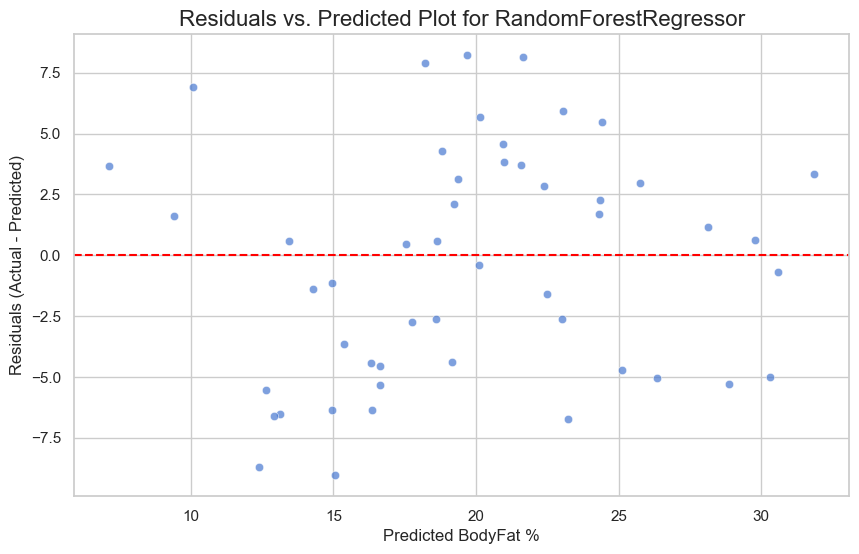

In [29]:
# --- Residuals Plot for Best Model ---
# This is the "classification report" for regression.
# It shows if your model is biased.
# A good model's residuals (errors) should be randomly scattered around zero.

best_model_instance = models_trained[best_model_name]
y_pred_best = best_model_instance.predict(X_test_processed)
residuals = y_test_np - y_pred_best

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_best, y=residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title(f'Residuals vs. Predicted Plot for {best_model_name}', fontsize=16)
plt.xlabel('Predicted BodyFat %')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# --- 1. Load Data ---
# Make sure your CSV file is named 'bodyfat.csv' or change the name here.
try:
    data = pd.read_csv('bodyfat.csv')
    print(f"Successfully loaded 'bodyfat.csv' with {len(data)} rows.")
except FileNotFoundError:
    print("Error: 'bodyfat.csv' not found.")
    print("Please make sure the file is in the same directory or provide the full path.")
    # Exit or raise error if file not found in a real script
    # For this example, we'll stop here.
    data = None
except Exception as e:
    print(f"An error occurred loading the CSV: {e}")
    data = None

if data is not None and not data.empty:
    
    # --- 2. Define Features (X) and Target (y) ---
    # We will predict 'BodyFat'
    # We drop 'Density' as it's directly related to BodyFat (1/Density)
    try:
        target_column = 'BodyFat'
        X = data.drop(columns=[target_column, 'Density']) 
        y = data[target_column]
        print(f"Features (X): {list(X.columns)}")
        print(f"Target (y): {target_column}")

        # --- 3. Split the Data ---
        # Using a standard 80% train / 20% test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

        # --- 4. Scale the Features ---
        # This is important for linear models like Ridge and Lasso
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        print("Features have been scaled.")

        # --- 5. Define Models ---
        models = {
            "Linear Regression": LinearRegression(),
            "Ridge Regression": Ridge(alpha=1.0),
            "Lasso Regression": Lasso(alpha=1.0),
            "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
            "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
        }

        # --- 6. Train and Evaluate ---
        print("\n--- Model Performance Results ---")
        results = {}

        for name, model in models.items():
            # Train the model on scaled training data
            model.fit(X_train_scaled, y_train)
            
            # Predict on the scaled test data
            y_pred = model.predict(X_test_scaled)
            
            # Calculate R-squared (Accuracy)
            r2 = r2_score(y_test, y_pred)
            results[name] = r2
            
            print(f"  {name}:")
            print(f"    R-squared (Accuracy): {r2:.4f}")

        # --- 7. Final Summary ---
        print("\n--- Accuracy Summary (Highest is Best) ---")
        sorted_results = sorted(results.items(), key=lambda item: item[1], reverse=True)
        for model_name, r2_value in sorted_results:
            print(f"  {model_name}: {r2_value:.4f}")

    except KeyError as e:
        print(f"\nError: A required column is missing from the CSV. {e}")
    except Exception as e:
        print(f"\nAn unexpected error occurred during processing: {e}")

Successfully loaded 'bodyfat.csv' with 252 rows.
Features (X): ['Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']
Target (y): BodyFat
Training samples: 201, Testing samples: 51
Features have been scaled.

--- Model Performance Results ---
  Linear Regression:
    R-squared (Accuracy): 0.6135
  Ridge Regression:
    R-squared (Accuracy): 0.6097
  Lasso Regression:
    R-squared (Accuracy): 0.5235
  Random Forest:
    R-squared (Accuracy): 0.6392
  Gradient Boosting:
    R-squared (Accuracy): 0.6454

--- Accuracy Summary (Highest is Best) ---
  Gradient Boosting: 0.6454
  Random Forest: 0.6392
  Linear Regression: 0.6135
  Ridge Regression: 0.6097
  Lasso Regression: 0.5235
